In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import os
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score,ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score
from sklearn import metrics

In [2]:
cwd = os.getcwd()
data_dir = os.path.join(cwd, "data")
file_loc = os.path.join(data_dir, "spam.csv")
df = pd.read_csv(file_loc)

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3944,ham,I will be gentle princess! We will make sweet ...,NaN,NaN,NaN
2537,ham,That's y we haf to combine n c how lor...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
112,ham,I'm ok wif it cos i like 2 try new things. But...,NaN,NaN,NaN
953,ham,Also remember to get dobby's bowl from your car,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)

In [6]:
df.sample(5)

,v1,v2
250,ham,Ranjith cal drpd Deeraj and deepak 5min hold
1125,spam,For taking part in our mobile survey yesterday...
1497,ham,I'm putting it on now. It should be ready for ...
5103,ham,In other news after hassling me to get him wee...
3684,ham,Wake me up at &lt;#&gt; am morning:)


In [7]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep = 'first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

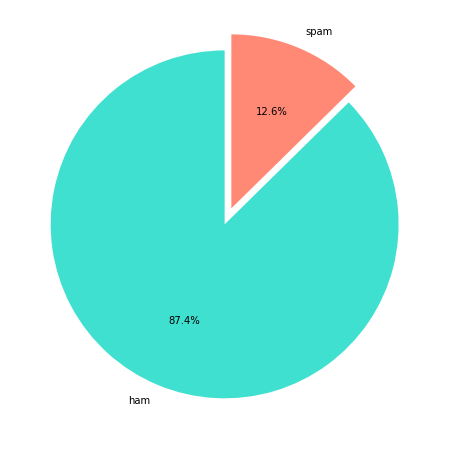

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%1.1f%%', colors = ['turquoise','#ff8975'], startangle=90, explode = (0, 0.1))
plt.show()

In [21]:
import nltk
df['num_characters'] = df['text'].apply(len)

# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

# num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [24]:
import seaborn as sns

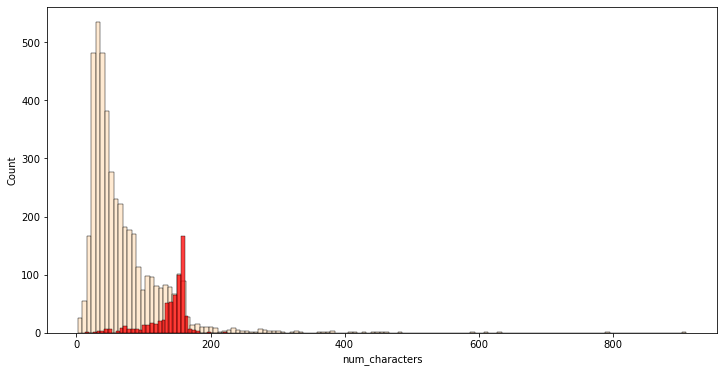

In [25]:
##distribution of spam and ham characters

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'], color = 'bisque')
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.show()

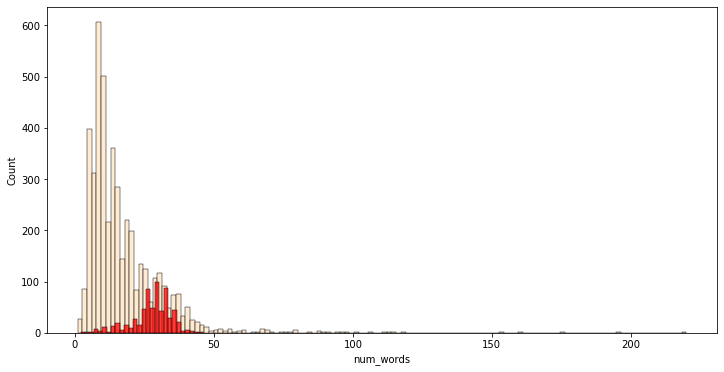

In [26]:
#distribution of spam and ham words

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'],color='bisque')
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show()


<Figure size 1008x432 with 0 Axes>

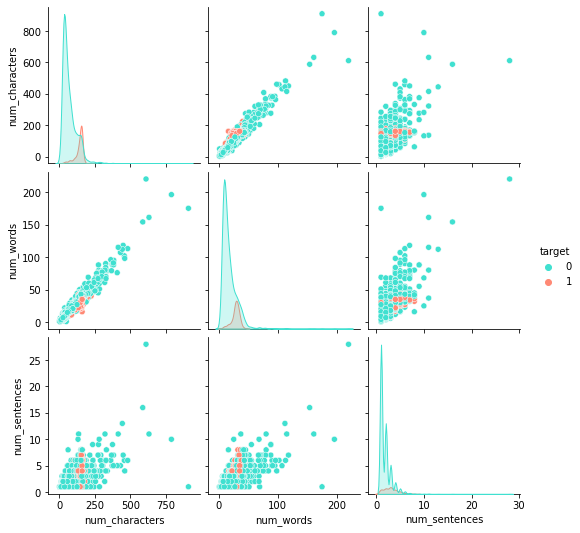

In [27]:
#pairplot
plt.figure(figsize=(14,6))
cols= ['turquoise','#ff8975'] 
sns.pairplot(df,hue='target',palette=cols)
plt.show()

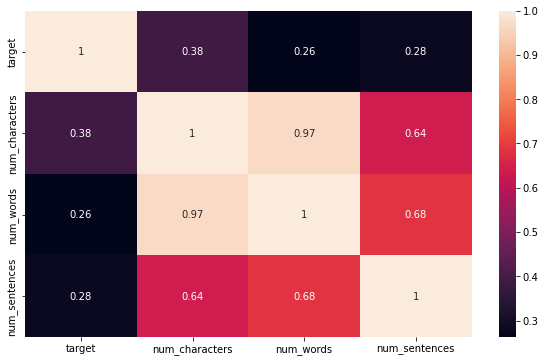

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [29]:
#lowercase, tokenization, special chars/punctualtion and stopwords removal

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    #retaining only numbers and alphabets
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    #clone copy of list y
    text = y[:]
    y.clear()
    
    #stopwords removal
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #stemming
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [30]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [31]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [32]:
#sample stemming result
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [33]:
df['transformed_text'] = df['text'].apply(transform_text)

In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [36]:
!pip install --upgrade pip

!pip install --upgrade Pillow

ERROR: To modify pip, please run the following command:
C:\Users\HP\anaconda3\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 2.1/2.1 MB 6.6 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 5.9 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\~-l\\_imaging.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
#spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
#plt.figure(figsize=(20,8))
#plt.imshow(spam_wc)
#plt.show()

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [40]:
len(spam_corpus)

9939

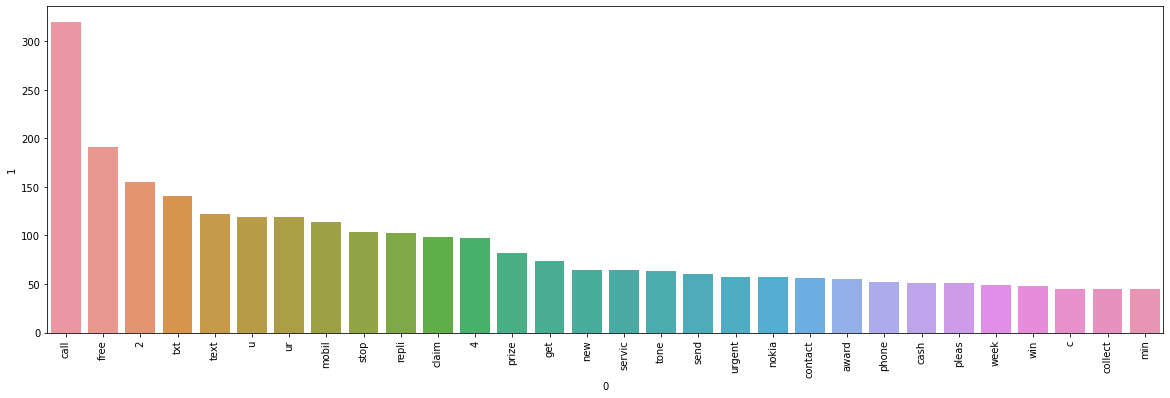

In [41]:
warnings.filterwarnings('ignore')

#using counter to keep a count of each word in corpus
from collections import Counter
plt.figure(figsize=(20,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [42]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [43]:
len(ham_corpus)

35394

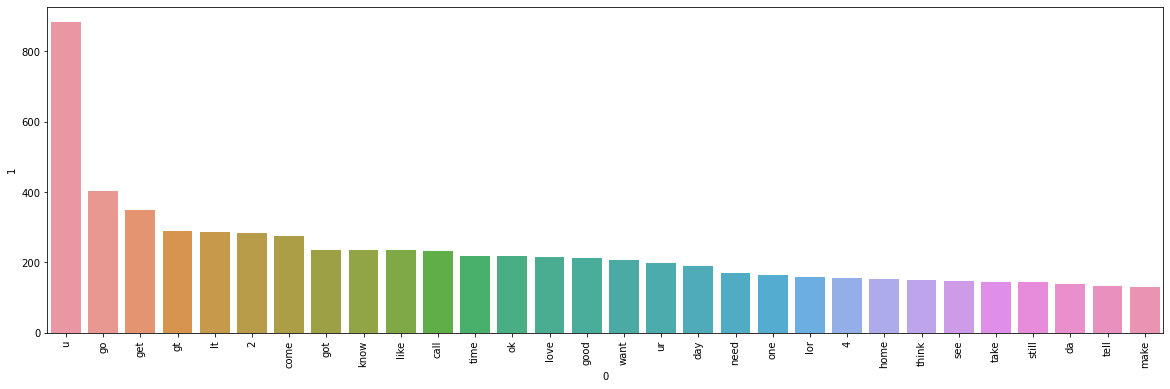

In [44]:
from collections import Counter
plt.figure(figsize=(20,6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()

##tfidf = TfidfVectorizer

#Setting max_features t0 3000 here after tring multiple random values this ones shows best results
tfidf = TfidfVectorizer(max_features=3000)

In [46]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
X.shape

(5169, 3000)

In [49]:
y = df['target'].values

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [52]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [54]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [55]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [57]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc =  BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt =GradientBoostingClassifier(n_estimators=50,random_state=2)

In [58]:
# DICTIONARY OF CLASSIFIERS

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
   
}

In [59]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    #train_accuracy = accuracy_score(X_train, y_train)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    
    return accuracy,precision,f1,recall

In [60]:
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []

for name,clf in clfs.items():
    
    current_accuracy, current_precision, f1_score, recall_score = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("\nFor classifier ",name, ":")

    print("  Test_Accuracy - ",current_accuracy)
    print("  Precision - ", current_precision)
    print("  F1 Score - ", f1_score)
    print("  Recall - ",recall_score)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(f1_score)
    recall_scores.append(recall_score)


For classifier  SVC :
  Test_Accuracy -  0.9758220502901354
  Precision -  0.9747899159663865
  F1 Score -  0.9027237354085604
  Recall -  0.8405797101449275

For classifier  KN :
  Test_Accuracy -  0.9052224371373307
  Precision -  1.0
  F1 Score -  0.44943820224719105
  Recall -  0.2898550724637681

For classifier  NB :
  Test_Accuracy -  0.9709864603481625
  Precision -  1.0
  F1 Score -  0.878048780487805
  Recall -  0.782608695652174

For classifier  DT :
  Test_Accuracy -  0.9294003868471954
  Precision -  0.8282828282828283
  F1 Score -  0.6919831223628692
  Recall -  0.5942028985507246

For classifier  LR :
  Test_Accuracy -  0.9584139264990329
  Precision -  0.9702970297029703
  F1 Score -  0.8200836820083682
  Recall -  0.7101449275362319

For classifier  RF :
  Test_Accuracy -  0.9748549323017408
  Precision -  0.9827586206896551
  F1 Score -  0.8976377952755905
  Recall -  0.8260869565217391

For classifier  AdaBoost :
  Test_Accuracy -  0.960348162475822
  Precision -  0.

In [61]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Test_Accuracy':accuracy_scores,'Precision':precision_scores, 'Recall':recall_scores, 'F1_Score':f1_scores}).sort_values('Precision',ascending=False)

In [62]:
cmap2 = ListedColormap(['turquoise','#ff8975'])
performance_df.style.background_gradient(cmap=cmap2)

,Algorithm,Test_Accuracy,Precision,Recall,F1_Score
1,KN,0.905222,1.000000,0.289855,0.449438
2,NB,0.970986,1.000000,0.782609,0.878049
5,RF,0.974855,0.982759,0.826087,0.897638
0,SVC,0.975822,0.974790,0.840580,0.902724
8,ETC,0.974855,0.974576,0.833333,0.898438
4,LR,0.958414,0.970297,0.710145,0.820084
6,AdaBoost,0.960348,0.929204,0.760870,0.836653
9,GBDT,0.947776,0.920000,0.666667,0.773109
7,BgC,0.957447,0.867188,0.804348,0.834586
3,DT,0.929400,0.828283,0.594203,0.691983


In [63]:
performance_df

,Algorithm,Test_Accuracy,Precision,Recall,F1_Score
1,KN,0.905222,1.000000,0.289855,0.449438
2,NB,0.970986,1.000000,0.782609,0.878049
5,RF,0.974855,0.982759,0.826087,0.897638
0,SVC,0.975822,0.974790,0.840580,0.902724
8,ETC,0.974855,0.974576,0.833333,0.898438
4,LR,0.958414,0.970297,0.710145,0.820084
6,AdaBoost,0.960348,0.929204,0.760870,0.836653
9,GBDT,0.947776,0.920000,0.666667,0.773109
7,BgC,0.957447,0.867188,0.804348,0.834586
3,DT,0.929400,0.828283,0.594203,0.691983


In [64]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [65]:
performance_df1

,Algorithm,variable,value
0,KN,Test_Accuracy,0.905222
1,NB,Test_Accuracy,0.970986
2,RF,Test_Accuracy,0.974855
3,SVC,Test_Accuracy,0.975822
4,ETC,Test_Accuracy,0.974855
5,LR,Test_Accuracy,0.958414
6,AdaBoost,Test_Accuracy,0.960348
7,GBDT,Test_Accuracy,0.947776
8,BgC,Test_Accuracy,0.957447
9,DT,Test_Accuracy,0.929400


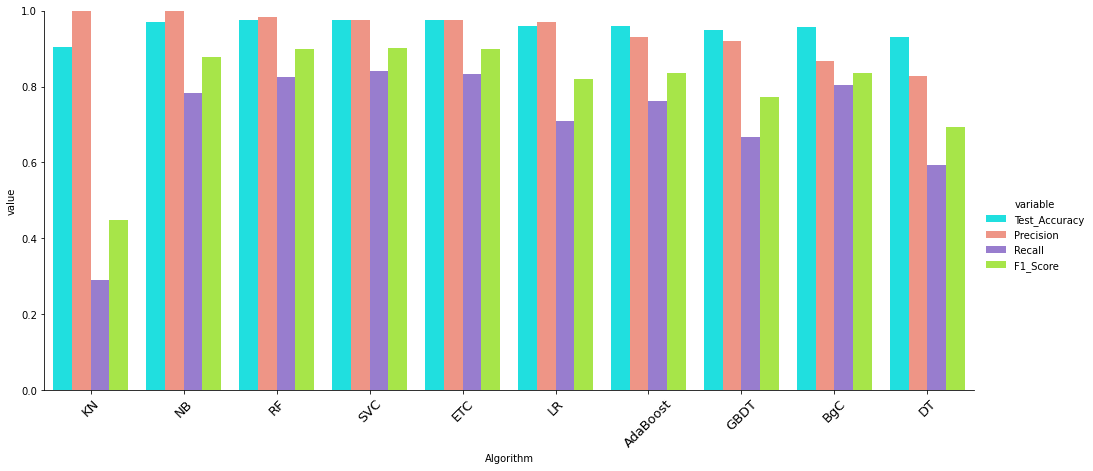

In [66]:
cols = cols= ['cyan','#ff8975', 'mediumpurple','greenyellow'] 
plt = sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=6, palette = cols, aspect=2.3)


plt.set(ylim=(0,1.0))
for axes in plt.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45, size=13)

In [67]:

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [68]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [69]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [70]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [71]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [72]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Test_Accuracy,Precision,Recall,F1_Score,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.289855,0.449438,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.782609,0.878049,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.826087,0.897638,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.840580,0.902724,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.833333,0.898438,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.710145,0.820084,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.760870,0.836653,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,GBDT,0.947776,0.920000,0.666667,0.773109,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000
8,BgC,0.957447,0.867188,0.804348,0.834586,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188
9,DT,0.929400,0.828283,0.594203,0.691983,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283


In [73]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [74]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


In [75]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


In [79]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))